# **Aviation Industry Risk Analysis**

### **Overview**

This project analyzes which aircrafts have the lowest risk for Peanut Butter INC. to enter the commercial and private enterprises industry. We are making our recommendation based on 90,000 incident records over the past 70 years.




### **Business Problem**

Peanut Butter INC. is expanding in to new industries to diversify its portfolio. They are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.

We are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.

### **Data Understanding**

In the data folder is a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

# **Importing Packages**

---

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# **Importing Project Data**

---

In [51]:
# Importing Avaiation_Data.csv:
df = pd.read_csv('data/Aviation_Data.csv', encoding='latin-1', low_memory=False)

Checking:  
- .head() 
- .tail()
- .info()

In [ ]:
df.head()

In [ ]:
df.tail()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23335 entries, 51802 to 90226
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   location                23335 non-null  object        
 1   investigation_type      23335 non-null  object        
 2   event_date              23335 non-null  datetime64[ns]
 3   country                 23335 non-null  object        
 4   injury_severity         23335 non-null  object        
 5   aircraft_category       23335 non-null  object        
 6   make                    23335 non-null  object        
 7   model                   23335 non-null  object        
 8   number_of_engines       23335 non-null  float64       
 9   engine_type             23335 non-null  object        
 10  total_fatal_injuries    23335 non-null  float64       
 11  total_uninjured         23335 non-null  float64       
 12  total_serious_injuries  23335 non-null  fl

# **General Data Cleaning**

---

Baseline Changes to Aviation_Data:

In [52]:
# Clean column names, replacing . to _ and making them lowercase
df = df.rename(columns={c: c.lower().replace('.', '_') for c in df.columns})

# Fortmating all object columns lowercase
df['make'] = df['make'].str.lower()
df['model'] = df['model'].str.lower()
df['location'] = df['location'].str.lower()
df['investigation_type'] = df['investigation_type'].str.lower()
df['country'] = df['country'].str.lower()
df['injury_severity'] = df['injury_severity'].str.lower()
df['aircraft_category'] = df['aircraft_category'].str.lower()
df['engine_type'] = df['engine_type'].str.lower()
df['amateur_built'] = df['amateur_built'].str.lower()

#dropping the columns we will not be using
df = df[['location','investigation_type','event_date','country',
         'injury_severity','aircraft_category','make',
         'model','number_of_engines','engine_type','total_fatal_injuries',
         'total_uninjured','total_serious_injuries','total_minor_injuries',
         'latitude','longitude','amateur_built']]

# Convert event_date column to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

# We will be looking at data from 2001 to 2022
df = df[df['event_date'] > '2001-11-19']

# Creating a new dataframe with data from the US
df = df[df['country'] == 'united states']

# Split location column into city and state columns + Cleaning format
df[['city', 'state']] = df['location'].str.split(', ', n=1, expand=True)
df['city'] = df['city'].str.lower()
df['state'] = df['state'].str.lower()

# Droping 7 missing null values in location
df.dropna(subset=['location'], inplace=True)

# populating injury_severity based on fatalities =/or/!= 0
df.loc[(df['total_fatal_injuries'] == 0) & (df['injury_severity'].isna()), 'injury_severity'] = 'non-fatal'
df.loc[(df['total_fatal_injuries'] != 0) & (df['injury_severity'].isna()), 'injury_severity'] = 'fatal'

######injury_sevarity values isolated to fatal & non-fatal
df.loc[~df['injury_severity'].isin(['fatal', 'non-fatal']), 'injury_severity'] = 'non-fatal'


# Cleaning amateur_built formatting + filtering to NOT amateur built
df = df[df['amateur_built'] == 'no']

# Droping 9 missing values in Make/Model + cleaning data
df.dropna(subset=['make'], inplace=True)
df.dropna(subset=['model'], inplace=True)

# Adding placeholder in 'state' for missing values = 'unknown' 
df['state'] = df['state'].fillna('unknown')

# Adding placeholder in 'longitude' & 'latitude' for missing values = 'unknown' 
df['longitude'] = df['longitude'].fillna('unknown')
df['latitude'] = df['latitude'].fillna('unknown')

# Dropping 883 missing values in number_of_engines + number_of_engines >= 1
df.dropna(subset=['number_of_engines'], inplace=True)
df = df[df['number_of_engines'] >= 1]

# Cleaning 'aircraft_category' with null values
engine_types = ['reciprocating', 'turbo prop', 'turbo fan', 'turbo jet']
df.loc[(df['aircraft_category'].isnull()) & (df['engine_type'].isin(engine_types)), 'aircraft_category'] = 'airplane'

# Dropping everything except 'Airplane' in engine_type
df.loc[~df['engine_type'].isin(engine_types), 'engine_type'] = np.nan
df.dropna(subset=['engine_type'], inplace=True)

# Filling missing value in total_fatal_injuries, total_serious_injuries, and total_minor_injuries
df['total_fatal_injuries'] = df['total_fatal_injuries'].fillna(0)
df['total_serious_injuries'] = df['total_serious_injuries'].fillna(0)
df['total_minor_injuries'] = df['total_minor_injuries'].fillna(0)
df['total_uninjured'] = df['total_minor_injuries'].fillna(0)


In [53]:
df.isna().sum().sort_values(ascending=False)

state                     0
number_of_engines         0
investigation_type        0
event_date                0
country                   0
injury_severity           0
aircraft_category         0
make                      0
model                     0
engine_type               0
city                      0
total_fatal_injuries      0
total_uninjured           0
total_serious_injuries    0
total_minor_injuries      0
latitude                  0
longitude                 0
amateur_built             0
location                  0
dtype: int64

# **Indivudal Dataframes for Analysis**

In [54]:
#Jimmy df
private_df = df

In [55]:
# Stuart df
geo_df = df

In [56]:
#Jordan df
commercial_df = df

# **Private Plane Analysis**

---

In [ ]:
## Research:
# Reciprocating = Yes; some are / aren't
# Turbo Prop = No
# Turbo Fan = Yes; some are / aren't
# Delete: Unknown, Turbo Shaft, Electric, UNK


commercial_df = commercial_df[(commercial_df['engine_type'] == 'Reciprocating') | (commercial_df['engine_type'] == 'Turbo Fan')]
commercial_df['engine_type'].value_counts()


In [ ]:
#Creating a figure showing investigation occurance by Airplane Make
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
makes=sns.barplot(data=private_planes, x=private_planes['make'].value_counts().index[:20], y=private_planes['make'].value_counts().values[:20])
makes.set_title('20 Most Frequent Airplane Makes Found in Investigations')
makes.set_xlabel('Make', fontsize=15)
makes.set_ylabel('Number of Occurrences', fontsize=15)
makes.set_xticklabels(private_planes['make'].value_counts().index[:20], rotation=-45, ha='left');
plt.show()

#Showing fatalities by Airplane Make
fatalities=private_planes.groupby('make')['total_fatal_injuries'].sum().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=private_planes, x=fatalities.index[:20], y=fatalities.values[:20])
f.set_title('Fatalities by Airplane Make', fontsize=15)
f.set_xlabel('Make', fontsize=15)
f.set_ylabel('Fatalities', fontsize=15)
f.set_xticklabels(fatalities.index[:20], rotation=-45, ha='left');
plt.show()


#Creating a figure showing investigation frequnecy by Airplane Model
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
makes=sns.barplot(data=private_planes, x=private_planes['model'].value_counts().index[:20], y=private_planes['model'].value_counts().values[:20])
makes.set_title('20 Most Frequent Airplane Models Found in Accidents', fontsize=15)
makes.set_xlabel('Model', fontsize=15)
makes.set_ylabel('Number of Occurrences', fontsize=15)
makes.set_xticklabels(private_planes['model'].value_counts().index[:20], rotation=-45, ha='center');
plt.show()

#Showing fatalities by Airplane Model
fatalities=private_planes.groupby('model')['total_fatal_injuries'].sum().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=private_planes, x=fatalities.index[:20], y=fatalities.values[:20])
f.set_title('Fatalities by Airplane Model', fontsize=15)
f.set_xlabel('Model', fontsize=15)
f.set_ylabel('Fatalities', fontsize=15)
f.set_xticklabels(fatalities.index[:20], rotation=-45, ha='left');
plt.show()

# **Commerical Plane Analysis**

---

Filtering to Commercial Planes only

In [57]:
## Research:
# Reciprocating = Yes; some are / aren't
# Turbo Prop = No
# Turbo Fan = Yes; some are / aren't
# Delete: Unknown, Turbo Shaft, Electric, UNK


# Identifying which **engine_type** is used for commercial planes and filtering accordingly:
#Only using **Reciprocating** and **Turbo Fan**:
commercial_df = commercial_df[(commercial_df['engine_type'] == 'reciprocating') | (commercial_df['engine_type'] == 'turbo fan')]
commercial_df['engine_type'].value_counts()

# Filtering to planes with 2 or more engines:
commercial_df = commercial_df[commercial_df['number_of_engines'] >= 2]
commercial_df['number_of_engines'].value_counts()

# Top US mnaufacters of Commercial Planes
commercial_manufacturers = [
    "airbus",
    "boeing",
    "embraer",
    "comac",
    "atr",
    "mcdonnell douglas",
    "mcdonnell",
    "tupolev",
    "ilyushin",
]

# Filtering dataframe to Commercial Planes only
make = commercial_df['make'].isin(commercial_manufacturers)
filtered_df = commercial_df[make]
filtered_df['make'].value_counts()
commercial_df = commercial_df[commercial_df['make'].isin(commercial_manufacturers)]


# confirming all of the 'models' are indeed commercial planes:
not_commercial = ['a75', 'a75n1', 'b75n1', 'a75n1(pt17)', 'a75n1 (pt17)', 'b75', 'e75', 'b17', 'emb-500', 'pt 17', 'n2s-3', 'a 75n1', 'a75n-1', 'd75n1', 'b-17g']

# the ~ in front of df is a negation operator to 
# do the opposite of the following action:
commercial_df = commercial_df[~commercial_df['model'].isin(not_commercial)]
#commercial_df['model'].value_counts()

Determining which **models** have had the most accident/incidents and if they were fatal/non-fatal:

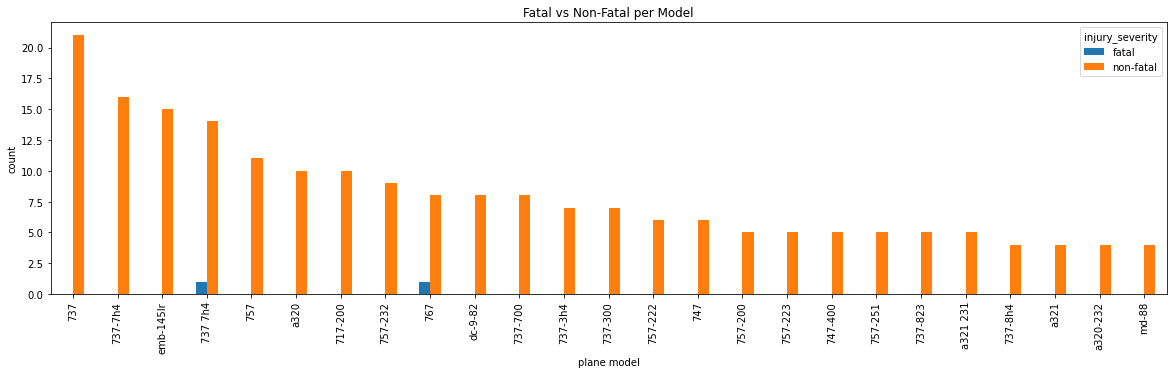

In [58]:
grouped_1 = commercial_df.groupby(['model', 'injury_severity']).size().unstack().sort_values(by='non-fatal', ascending=False).head(25)

# plot
grouped_1.plot(kind='bar', stacked=False, figsize=(20,5))
plt.xlabel('plane model')
plt.ylabel('count')
plt.title('Fatal vs Non-Fatal per Model')

plt.show()

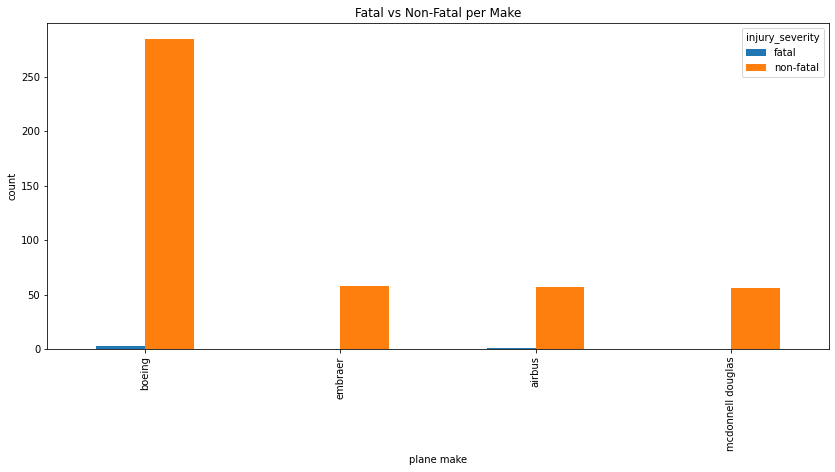

In [60]:
grouped_2 = commercial_df.groupby(['make', 'injury_severity']).size().unstack().sort_values(by='non-fatal', ascending=False).head(25)

# plot
grouped_2.plot(kind='bar', stacked=False, figsize=(14,6))
plt.xlabel('plane make')
plt.ylabel('count')
plt.title('Fatal vs Non-Fatal per Make')

plt.show()

Identifying ALL **Fatal** situations and researching them individually:

In [65]:
commercial_df.loc[commercial_df['injury_severity'] == 'fatal']

,location,investigation_type,event_date,country,injury_severity,aircraft_category,make,model,number_of_engines,engine_type,total_fatal_injuries,total_uninjured,total_serious_injuries,total_minor_injuries,latitude,longitude,amateur_built,city,state
74008,"san francisco, ca",accident,2013-07-06,united states,fatal,airplane,boeing,777-200er,2.0,turbo fan,3.0,50.0,137.0,50.0,373648N,1222150W,no,san francisco,ca
74252,"birmingham, al",accident,2013-08-14,united states,fatal,airplane,airbus,a300 - f4 622r,2.0,turbo fan,2.0,0.0,0.0,0.0,333350N,0086488W,no,birmingham,al
82061,"philadelphia, pa",accident,2018-04-17,united states,fatal,airplane,boeing,737 7h4,2.0,turbo fan,1.0,8.0,125.0,8.0,395219N,0751424W,no,philadelphia,pa
83727,"trinity bay, tx",accident,2019-02-23,united states,fatal,airplane,boeing,767,2.0,turbo fan,3.0,0.0,0.0,0.0,294612N,0943936W,no,trinity bay,tx


## Fatal Accident Context:

1. boeing 777-200er (2013-07-06):
- **Pilot error**; upon landing.
- documentation: https://aviation-safety.net/database/record.php?id=20130706-0

2. airbus a300 - f4 622r (2013-08-14):
- **Pilot error**; failure to properly configure and verify the flight management computer for the profile approach
- documentation: https://aviation-safety.net/database/record.php?id=20130814-0

3. boeing 737 7h4 (2018-04-17):
- **metal fatigue** in the area where the blade broke in the engine.
- documentation: https://aviation-safety.net/database/record.php?id=20180417-0

4. boeing 767 (2019-02-23):
- **Pilot error**; inappropriate response by the first officer as the pilot flying to an inadvertent activation of the go-around mode, which led to his spatial disorientation.
- documentation: https://aviation-safety.net/database/record.php?id=20190223-0

# **Location of Operation Analysis**

---